In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

In [4]:
def draw_styled_landmarks(image, results):
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style())

In [8]:
cap = cv2.VideoCapture(0)

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
# Set mediapipe model
with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        # read feed
        ret, frame = cap.read()
        
        # make detections
        image, results = mediapipe_detection(frame, hands)
        print(results)

        # draw landmarks
        draw_styled_landmarks(image, results)

        # show to screen
        cv2.imshow('OpenCV Feed', image)

        # break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
cap.release()
cv2.destroyAllWindows()

In [9]:
draw_styled_landmarks(frame, results)

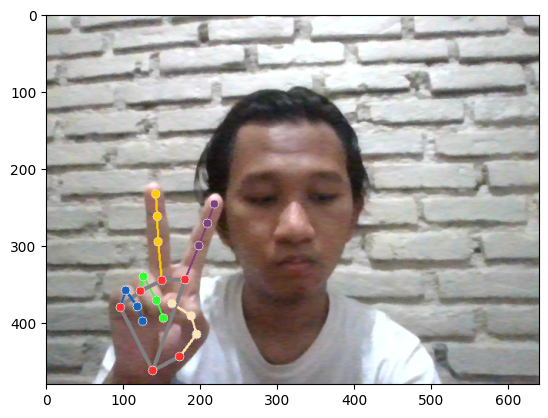

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
hand = []
for res in results.multi_hand_landmarks:
    for id, lm in enumerate(res.landmark):
        test = np.array([lm.x, lm.y, lm.z])
        hand.append(test)
        

TypeError: 'NoneType' object is not iterable

In [6]:
def extract_keypoints(results):
    keypoints = np.array([[res.landmark[i].x, res.landmark[i].y, res.landmark[i].z] for res in results.multi_hand_landmarks for i in range(21)]).flatten() if results.multi_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([keypoints])

In [7]:
DATA_PATH = os.path.join('dataset_hands2')
actions = np.array(['hello', 'thanks'])
no_sequences = 5
sequence_length = 30

In [11]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [12]:
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()
                # make detections
                image, results = mediapipe_detection(frame, hands)
                # draw landmarks
                draw_styled_landmarks(image, results)
                # wait
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12),
                              cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                # save keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                # break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [9]:
cap.release()
cv2.destroyAllWindows()

In [8]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [9]:
label_map = {label:num for num, label in enumerate(actions)}

In [10]:
label_map

{'hello': 0, 'thanks': 1}

In [11]:
np.load('dataset_hands2/hello/0/1.npy')

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
sequences = []
labels = []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)), allow_pickle=True)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (10, 30) + inhomogeneous part.

In [15]:
sequences

[[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [127]:
X.shape

(10, 30)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if((logs.get('loss')<0.3 and logs.get('categorical_accuracy')>0.9) 
           and (logs.get('val_loss')<0.3 and logs.get('val_categorical_accuracy')>0.9)):
            print("\nTarget akurasi tercapai")
            self.model.stop_training = True

In [27]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(X.shape[0],X.shape[1])))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [28]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.summary()

In [30]:
callback = myCallback()
model.fit(X_train, y_train, epochs=2000, callbacks=[callback], validation_data=(X_test, y_test)) # Sesuaikan jumlah epochs
# Cek lagi hasilnya, jangan sampai overfitting atau underfitting
# Untuk kondisi sekarang: Overfitting karena data terlalu sedikit yang mengakibatkan akurasi training tinggi, tapi testing rendah

In [31]:
model.save('hand2.h5') ## nama file bisa disesuaikan